In [1]:
import numpy as np
from typing import *
import matplotlib.pyplot as plt
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/home/nghiatnh/Study/Sem5/AIL302m/Projects/AIL302m-Machine_Learning/')
from Modules.classification.multi_layer_perceptron import MultilayerPerceptron

In [2]:
N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j


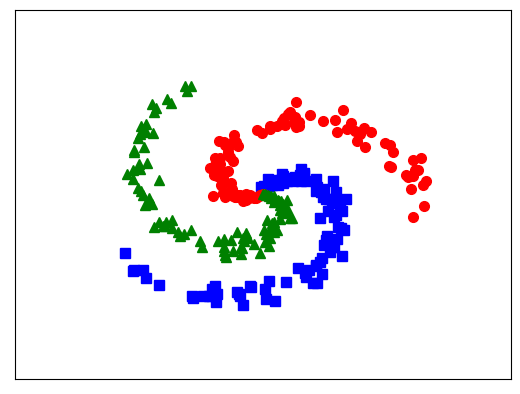

In [3]:
# lets visualize the data:

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.show()


In [5]:
clf = MultilayerPerceptron(max_iter=10000, tol=1e-4, batch_size=50, hidden_layer_sizes=(100,), learning_rate=0.01, show_loss=True)
clf.fit(X.T, y.T)

(300,)
6
epoch 1000, loss: 0.048697
epoch 2000, loss: 0.031370
epoch 3000, loss: 0.025836
epoch 4000, loss: 0.022944
epoch 5000, loss: 0.021149
epoch 6000, loss: 0.019881
epoch 7000, loss: 0.018937
epoch 8000, loss: 0.018202
epoch 9000, loss: 0.017593
epoch 10000, loss: 0.017081


[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]


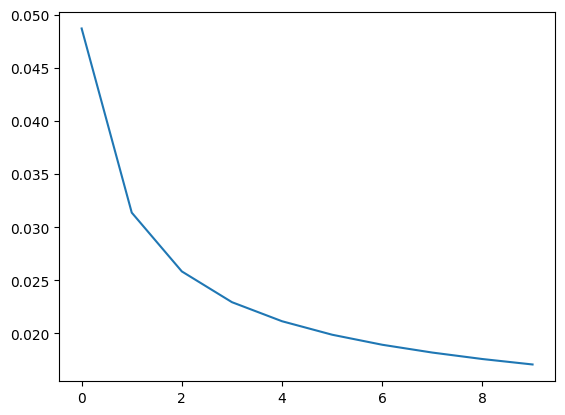

In [7]:
print(clf.predict(X[:,120:130].T))
print(y[120:130].T)
plt.plot(range(len(clf.loss_curve_)), clf.loss_curve_)
plt.show()

In [9]:
print("accuracy: {} %".format(clf.score(X.T, y) * 100))

accuracy: 99.33333333333333 %
